# Исследование данных сервиса аренды самокатов GoFast


Изучение популярного сервиса аренды самокатов GoFast. Детальное изучение данных о некоторых пользователях из нескольких городов, а также об их поездках. Анализ данных и проверка гипотез, которые могут помочь бизнесу вырасти.

**Данные:**

В исследовании используются данные о некоторых пользователях из нескольких городов, а также об их поездках из сервиса аренды самокатов GoFast. Данные собраны из мобильным приложения GoFast. В основных данных есть информация о пользователях, их поездках и подписках.

**Цели исследования:**
* Проанализировать данные сервиса аренды самокатов GoFast.
* Отдельно рассмотреть данные о некоторых пользователях из нескольких городов, а также об их поездках.
* Определить текущую выручку сервиса, и проанализировать интерес пользователей с подпиской и без подписки к сервису аренды самокатов GoFast.
* Проверить гипотезы и изучить расределения данных.
  

##  **Исследование файлов с данными и изучение общей информации**

### Импортирем библиотеки pandas, matplotlib, seaborn, scipy, numpy:

In [1855]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm 
import matplotlib.ticker as ticker

### Запишем данные из csv-файлов и сохраним их в датафреймы.
 
Пути к файлам:   
`/datasets/users_go.csv` — данные с информацией о пользователях (путь к данным на сервере).    
`/datasets/rides_go.csv` — данные о поездках пользователей (путь к данным на сервере).     
`/datasets/subscriptions_go.csv` — данные о пользователей (путь к данным на сервере).     

In [1856]:
# запишем данные из csv-файлов в датафреймы, указав попытку загрузки с локального сервера, а затем с файл-сервера 
try:
    users = pd.read_csv('datasets/users_go.csv')
except FileNotFoundError:
    user = pd.read_csv('/datasets/users_go.csv')

try:
    rides = pd.read_csv('datasets/rides_go.csv')
except FileNotFoundError:
    rides = pd.read_csv('/datasets/rides_go.csv')

try:
    subscriptions = pd.read_csv('datasets/subscriptions_go.csv')
except FileNotFoundError:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
    

### Изучим общую инфомацию о датафреймах и посмотрим их первые строки.

In [1857]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [1858]:
rides.info()
rides.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [1859]:
subscriptions.info()
subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


По общей информации и первым строкам видно, что датафреймы `users`, `rides` содержат количественную и категориальную информацию о поездках  пользователей - имени пользователя, дистанции и продолжительности поездок, дате, городе поездок. А датафрейм `subscriptions` содержит информацию только о 2 вариантах оплаты за услуги сервиса и собранных данных о поездках он не содержит, поэтому анализ распределения количественных показателей датафрейму не требуется.  

Построим гистограммы для всех количественных столбцов датафреймов `users`, `rides`: 

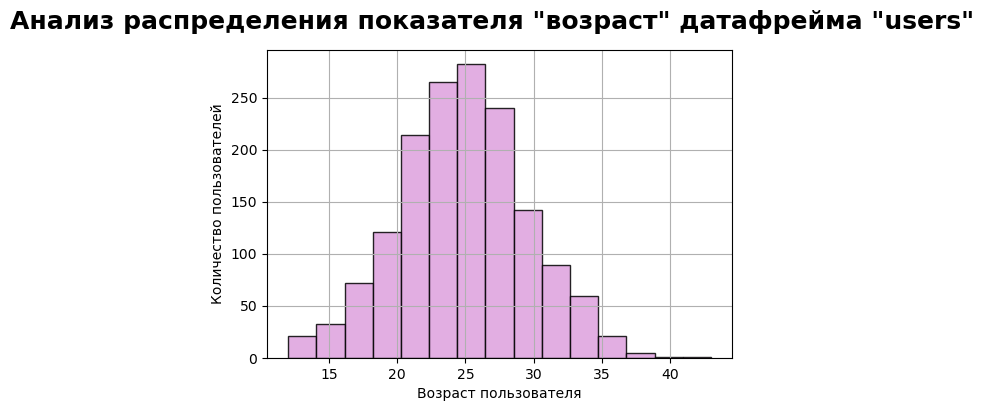

In [1860]:
plots = users['age'].hist(figsize=(6, 4), 
                          color='#DDA0DD',  # цвет столбцов
                          edgecolor='black', # обводка столбцов
                          alpha=0.85,
                          bins=15) 
plt.ylabel('Количество пользовaтелей') 
plt.xlabel('Возраст пользователя')
plt.suptitle('Анализ распределения показателя "возраст" датафрейма "users"', fontsize=18, fontweight='bold')
plt.show() 

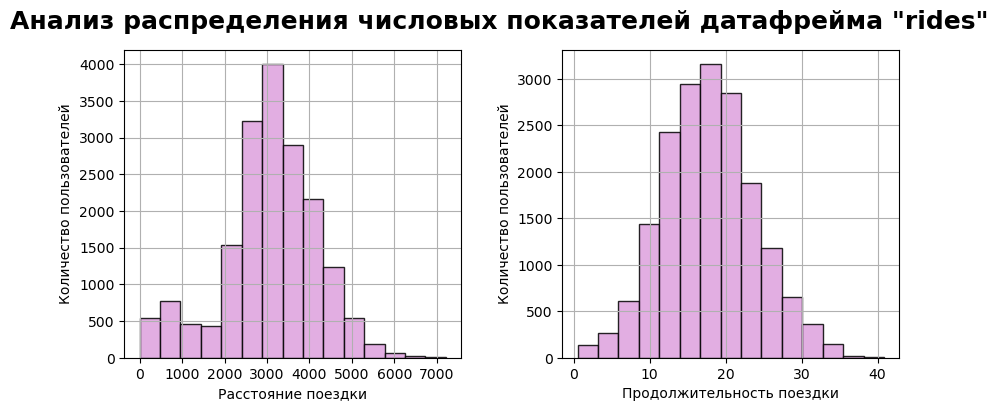

In [1861]:
numeric_cols = rides.select_dtypes(include=['int64', 'float64']).columns # выбираем только числовые столбцы

numeric_cols = numeric_cols.drop('user_id')  # исключаем user_id

plots = rides[numeric_cols].hist(figsize=(10, 4),
                   color='#DDA0DD',  
                   edgecolor='black', 
                   alpha=0.85,
                   bins=15) 
x_labels = ['Расстояние поездки', 'Продолжительность поездки']
# через цикл передадим названия гистограммам из списка x_labels
for i, pl in enumerate(plots.flatten()):
    # подписи осей х
    if i < len(x_labels):
        pl.set_xlabel(x_labels[i])
    else:
        pl.set_xlabel(pl.get_title()) # стандартное название если не хватит 
                                      # названий в списке
        # подписи осей у
    pl.set_ylabel('Количество пользовaтелей') 
    pl.set_title('')
plt.suptitle('Анализ распределения числовых показателей датафрейма "rides"', fontsize=18, fontweight='bold')
plt.show()


**Вывод по этапу "Исследование файлов с данными и изучение общей информации":**

рассмотрев общую информацию и первые строки датафреймов, обнуружили, что отсутсвуют пропуски по всех столбцах 3 датафреймов. Все названия датафреймов написаны в соответсвии с со стилем кода.   
Количественный параметр `age`: распределение возраста приблизительно нормальное. Но наблюдается небольшой хвост после 40.  
Количественный параметр `duration`: график имеет скошенность вправо, скорее всего преобладают более короткие по продолжительности поездки.  
Количественный параметр  `distance`  имеет скошенность графико вправо, возможно очень много поездок длинной до километра, либо пользователи сталкиваются с техническими неисправностями в начале поездки. Данные необходимо проверять статистическими тестами.   
Также требуется корректировка в типах данных, таких как `date` датафрейма `rides`.  

Датафрейм `subscriptions` содержит информацию только о двух вариантах оплаты за услуги сервиса, все данные заполнены в соответсвии с технических заданием без аномалий и ошибок, отсутсвуют пропуски, а названия столбцов записаны в соответсвии со стилем кода. Поэтому дальнейшая предобработка данного датафрейма не требуется. 

##  Предобработка данных

### Изменение типа данных в столбцах.

Изменим тип данных в столбце `date` датафрейма `rides` на тип дата: 

In [1862]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d') 

### Добавление новых столбов.

Создадим новый столбец `month` с номером месяца на основе столбца `date`:

In [1863]:
rides['month'] = pd.DatetimeIndex(rides['date']).month

### Проверка наличия пропущенных значений и дубликатов в датафреймах.

Предобработку будем осуществлять над датафреймами `users`, `rides`, так как на стадии загрузки и первичной оценки данных, был сделан вывод, что датафрейм `subscriptions` содержит информацию только о двух вариантах оплаты за услуги сервиса строго в соответсвии с тех.заданием, и дальнейшая предобработка данного датафрейма не требуется. 

Перед обработкой пропущенных значений и дубликатов создадим копию датафреймов `users` и `rides`:

In [1864]:
temp_users = users.copy() # создаем копию датасета users до преобразования
len(temp_users)  # зафиксируем размер датасета до преобразования 

1565

In [1865]:
temp_rides = rides.copy() # создаем копию датасета rides до преобразования
len(temp_rides) 

18068

#### Проверка пропусков в датафреймах.

Поcмотрим соотношения пропусков в каждом столбцах `users` и `rides`:

In [1866]:
pd.DataFrame(round(users.isna().mean()*100,)
            ).style.background_gradient('coolwarm') 

,0
user_id,0.000000
name,0.000000
age,0.000000
city,0.000000
subscription_type,0.000000


In [1867]:
pd.DataFrame(round(rides.isna().mean()*100,)
            ).style.background_gradient('coolwarm') 

,0
user_id,0.000000
distance,0.000000
duration,0.000000
date,0.000000
month,0.000000


**Вывод:** пропуски отсутсвуют по всех столбцах датафреймов `users`, `rides`, как отмечалось ранее на стадии загрузки и предварительной оценки данных.

#### Обработка дубликатов в датафреймах.

Исследуем датафреймы `users`, `rides`на явные дубликаты.

In [1868]:
users.duplicated().sum()

31

In [1869]:
rides.duplicated().sum()

0

Найден 31 дубликат в датафрейме `users`. 
Удалим из набора данных `users` повторяющие строки, оставив первые вложения дублирующихся строк и сбросив индексацию строк:

In [1870]:
users = users.drop_duplicates().reset_index() 

Далее поищем неявные дубликаты в категориальных столбцах датасетов `users`, `rides`: 
* `city`
* `subscription_type`

In [1871]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [1872]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

Неявные дубликаты отсутствуют в датафреймах `users`, `rides`.

Сопоставим размер датасета `users` и ее копии до преобразований `temp_users`:

In [1873]:
print('Длина датафрейма `users` уменьшлась на', (len(temp_users) - len(users)))

Длина датафрейма `users` уменьшлась на 31


**Вывод по этапу "Предобработки данных":**

На этапе предобработки данных :
* в столбце `date` данные были преобразованы в тип данных `дата`.
* был добавлен новый столбец `month` с номером месяца на основе столбца `date`:
* установили, что пропуски отсутствуют по всех столбцах датафреймов `users`, `rides` и `subscriptions`.
* было найдено и удалено 31 дубликатов в датафрейме `users`. Таким образом, актуальная длина датасета `users` составляет 1534.
* явные и неявные дубликаты в столбцах не найдены. Названия категориальных данных не длинные и удобны для дальнейших расчетов во всех датафреймах. 

## Исследовательский анализ данных

На данном этапе исследуем общую информацию о пользователях и поездках и визуализируем ее в графиках.

###  Исследование частоты встречаемости городов.

In [1874]:
users['city'].value_counts() 

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

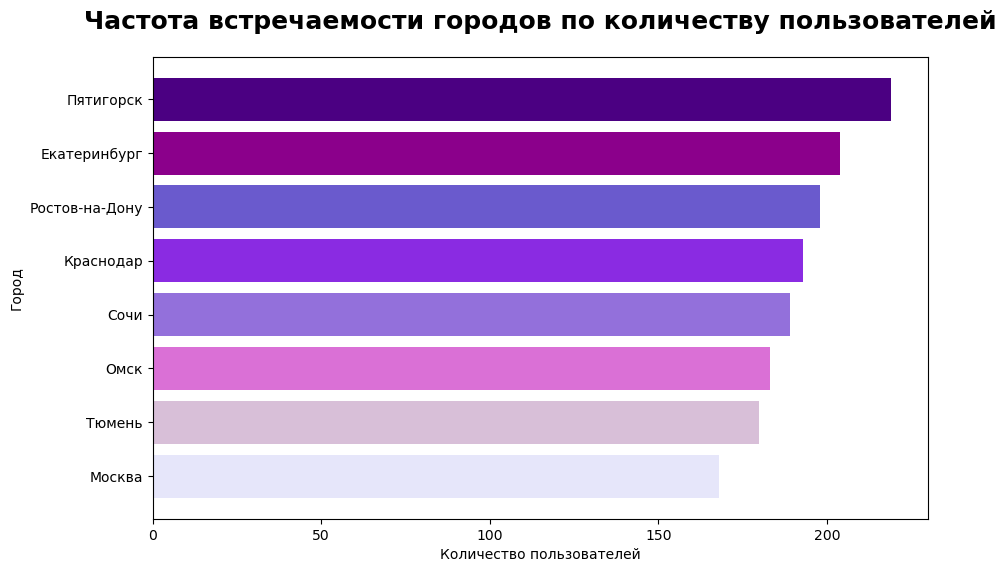

In [1875]:
city_counts = users['city'].value_counts(ascending=True) # сортируем города по количеству польз-й по убывающей
city_counts.columns = ['Город', 'Количество пользователей']

# cоздаем график с помощью  matplotlib
plt.figure(figsize=(10, 6))
colors = ('#E6E6FA', '#D8BFD8','#DA70D6', '#9370DB', '#8A2BE2', '#6A5ACD', '#8B008B', '#4B0082')

# настройки горизонтальных столбцов
bars = plt.barh(
    city_counts.index,
    city_counts.values,
    color=colors,
    height=0.8)
# подписывем оси 
plt.title('Частота встречаемости городов по количеству пользователей', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')

plt.show()

**Вывод:**  по данным сервиса аренды самокатов GoFast по частоте встречаемости самый популярный оказался Пятигорск, а также в пятерку вошли Екатеринбург, Ростов-на-Дону, Краснодар и Сочи. Реже всего сервис встречается в Москве.

### Исследование соотношения пользователей с подпиской и без подписки.

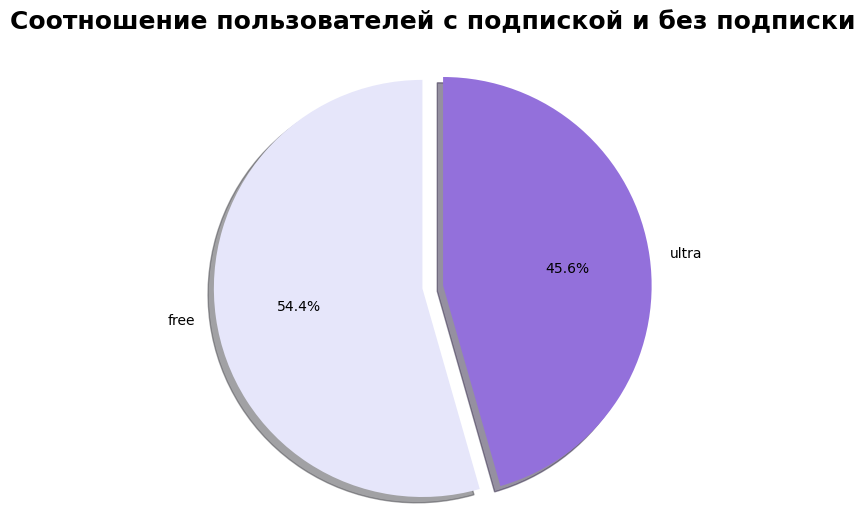

In [1876]:
subscription_counts = users['subscription_type'].value_counts()
                                         
# cтроим круговую диаграмму
plt.figure(figsize=(6,6))

plt.pie(subscription_counts.values,
        labels=subscription_counts.index, # части пирога назовем данными из колонки сводной таблицы
        autopct='%1.1f%%',  # проценты с одним знаком после запятой
        startangle=90,      # начало отсчета (вершина)
        shadow=True,       # тень для эффекта объема
        colors=['#E6E6FA','#9370DB'],  # цвета для категорий
        explode=(0.1, 0))  # выделяем первый сегмент
plt.title('Соотношение пользователей с подпиской и без подписки',fontsize=18, pad=20, fontweight='bold')
plt.axis('equal')  # делаем диаграмму круглой
plt.show()


**Вывод:**  по данным сервиса аренды самокатов GoFast пользователи без подписки больше пользуются сервисом. Отрыв составляет около 9%. 

### Исследование соотношения возрастов пользователей.

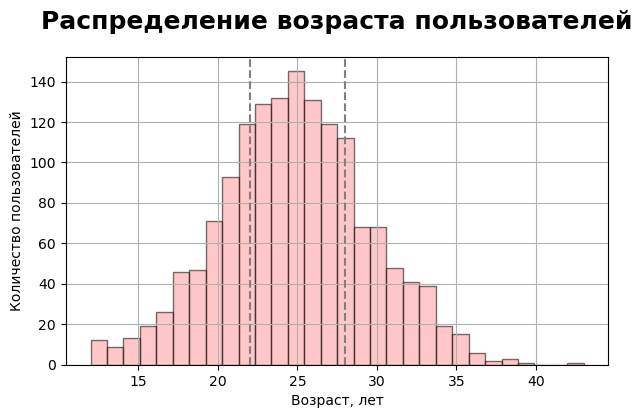

In [1877]:
users['age'].hist(figsize=(7, 4), 
                  bins=30, 
                  color='#ff9999',  
                  edgecolor='black', 
                  alpha=0.55) 
plt.title('Распределение возраста пользователей', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество пользователей')

# расчет квантилей
for q in [0.25, 0.75]:
    quantile = users['age'].quantile(q)
    plt.axvline(quantile, color='gray', linestyle='--')
    
plt.show()

**Вывод:** Распределение возраста пользователей близко к нормальному с пиком в 25 лет, что указывает на наибольшую популярность сервиса среди молодых взрослых. 50% пользователей между первым и третьим квартилями (22-28 лет) определяет центр целевой аудитории сервиса.

### Анализ расстояния, которое пользователь преодолел за одну поездку.

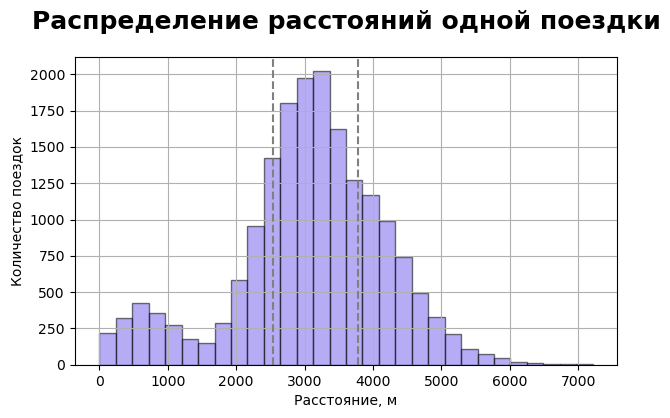

In [1878]:
rides['distance'].hist(figsize=(7, 4), 
                       bins=30, 
                       color='#7B68EE',  
                       edgecolor='black', 
                       alpha=0.55) 
plt.title('Распределение расстояний одной поездки', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')

# расчет квантилей
for q in [0.25, 0.75]:
    quantile = rides['distance'].quantile(q)
    plt.axvline(quantile, color='gray', linestyle='--')
    
plt.show()

**Вывод:** распределение расстояния, которое пользователь преодолел за одну поездку, имеет пик около 3400 метров - это самая частотная дистанция, на которую люди передвигаются на самокатах. 50% дистанций поездок лежит в интервале между первым и третьим квартилями  - это примерно от 2500 метров до 3700 метров.   
    Скошенность графика вправо говорит о том, что поездки чаще более короткие, чем длинные, что типично для городского передвижения (до метро от дома и пр.). Заметный всплеск у нуля (0 - 500 метров), возможно, это могли быть тестовые поездки или артефакты данных или неисправность самокатов, которая вынуждала пользователей остановить поездку.   
    Отмечаются значения справа 4000-7000 метров как более редкие дальние поездки.

### Анализ продолжительности поездок.

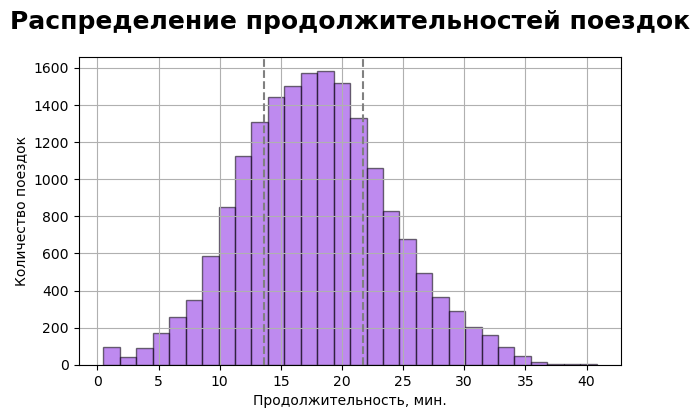

In [1879]:
rides['duration'].hist(figsize=(7, 4), 
                       bins=30, 
                       color='#8A2BE2',  
                       edgecolor='black', 
                       alpha=0.55) 
plt.title('Распределение продолжительностей поездок', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Продолжительность, мин.')
plt.ylabel('Количество поездок')

# расчет квантилей
for q in [0.25, 0.75]:
    quantile = rides['duration'].quantile(q)
    plt.axvline(quantile, color='gray', linestyle='--')
    
plt.show()

**Вывод:** распределение продолжительностей поездок имеет пик около 18 минут - это самая частотная продолжительность поездок на самокатах в сети GoFast. 50% поездок лежит в интервале между первым и третьим квартилями  - это примерно от 13 до 22 минут.   
    Скошенность графика вправо говорит о том, что поездки чаще более короткие, чем длинные, как и анализ с дистанцией поездок (но это типично для городского передвижения). Есть всплеск слева у нуля до 2 минут, возможно, это могли быть тестовые поездки или артефакты данных или неисправность самокатов, которая вынуждала пользователей остановить поездку.   
    Отмечаются значения справа 30-40 минут, как более редкие длительные поездки.

**Вывод по этапу "Исследовательский анализ данных":**

На этапе исследовательского анализа данных выявили, что:
* чаще самокатами GoFast пользуются в Пятигорске, а также в Екатеринбурге, Ростове-на-Дону, Краснодаре и Сочи. Реже всего сервис аренды самокатов GoFast используется в Москве.
* пользователей без подписки больше на примерно 9%, чем пользователей с подпиской в сервисе GoFast.
* наибольшая популярность сервиса GoFast держится среди молодых взрослых около 25 лет. 50% пользователей это 22-28 лет, что определяет центр целевой аудитории сервиса.
* 3400 метров - это самая частотная дистанция, на которую люди передвигаются на самокатах GoFast. Половина дистанций поездок лежит примерно от 2500 метров до 3700 метров, и поездки чаще более короткие, чем длинные, что типично для городского передвижения (до метро от дома и пр.). Замечен всплеск у нуля до 500 метров, возможно, это могли быть тестовые поездки, артефакты данных или неисправность самокатов, которая вынуждала пользователей остановить поездку. Отмечаются редкие дальние поездки 4000-7000 метров.
* 18 минут - это самая частотная продолжительность поездок на самокатах в сети GoFast. 50% поездок лежит в интервале от 13 до 22 минут. И поездки чаще более короткие, чем длинные. Есть всплеск слева у нуля до 2 минут, возможно, это могли быть тестовые поездки или артефакты данных или неисправность самокатов. Отмечаются более редкие длительные поездки 30-40 минут.
  

## Объединение данных, создание новых датафреймов и их визуализация

### Объединение данных о пользователях, поездках и подписках в один датафрейм. 

Для объединения используем метод `merge()` и параметр `outer` для того, чтобы сохранить все записи в 3 датафреймах, а информацию пользователей и подписок подвязать к каждой поездке:

In [1880]:
merged_df = users.merge(rides, on='user_id', how='outer'   # объединяем 'user' и 'rides' с помощью параметра 'outer' в merge()
                        ).merge(subscriptions, on='subscription_type',  how='outer'
                               ).sort_values(by='user_id') # объединяем с 'subscriptions' с помощью параметра 'outer' 
merged_df.head() # проверим объединение

,index,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
11575,0,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
11576,0,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
11579,0,1,Кира,22,Тюмень,ultra,2720.609748,9.529463,2021-12-22,12,6,0,199
11578,0,1,Кира,22,Тюмень,ultra,4031.020195,17.674448,2021-12-14,12,6,0,199
11577,0,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


**Вывод:**  oбъединение данных о пользователях, поездках и подписках в один датафрейм `merged_df` произведенен успешно. Был использован метод `merge()` и параметр `outer`. Сохранены все записи из самого объемного датафрейма `rides`. Всего записей в новом датафрейме 18068. Информация из датафреймов о пользователях `users` и подписках `subscriptions` подвязались к каждой поездке в `rides`.

### Создание новых датафреймов.

Создадим два датафрейма из датафрейма `merged_df`:
* c данными о пользователях без подписки,
* с данными о пользователях с подпиской.

In [1881]:
merged_df_free = merged_df.query('subscription_type == "free"')
print(len(merged_df_free))
merged_df_ultra = merged_df.query('subscription_type == "ultra"')
print(len(merged_df_ultra))

11568
6500


**Вывод:** из датафрейма `merged_df` успешно созданы два новых датафрейма: c данными о пользователях без подписки - `merged_df_free`(11568 записей) и с данными о пользователях с подпиской - `merged_df_ultra` (6500 записей).

### Визуализация данных о расстоянии и времени поездок для пользователей обеих категорий.

Построим `гистораммы расстояний поездок` c данными о пользователях без подписки (1) и с подпиской (2):

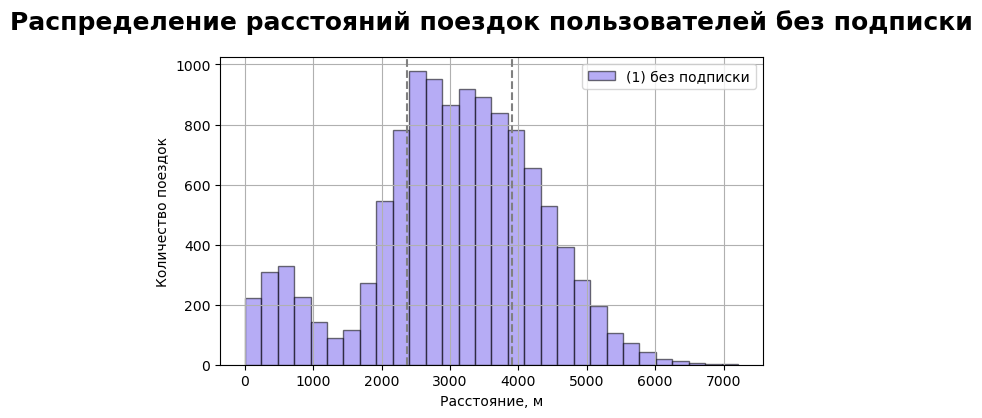

In [1882]:
merged_df_free['distance'].hist(figsize=(7, 4), 
                                bins=30, 
                                color='#7B68EE',   
                                edgecolor='black',  
                                alpha=0.55) 
plt.title('Распределение расстояний поездок пользователей без подписки', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.legend(['(1) без подписки'])

# расчет квантилей
for q in [0.25, 0.75]:
    quantile = merged_df_free['distance'].quantile(q)
    plt.axvline(quantile, color='gray', linestyle='--')
    
plt.show()

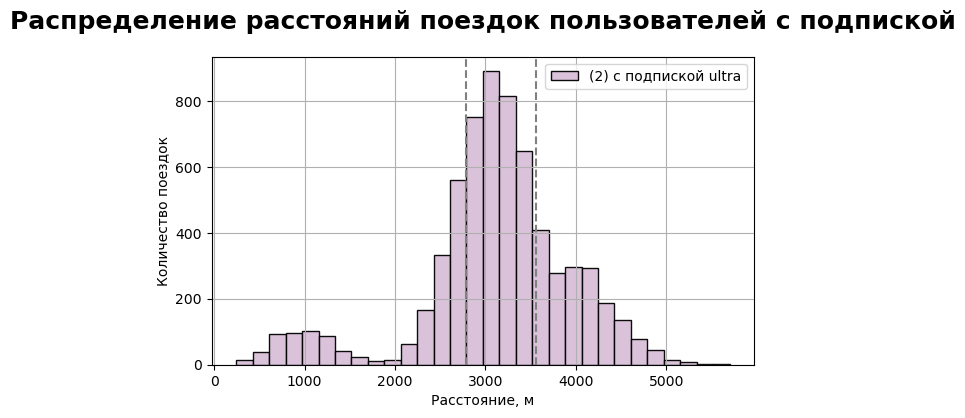

In [1883]:
merged_df_ultra['distance'].hist(figsize=(7, 4), 
                                 bins=30, 
                                 color='#D8BFD8', 
                                 edgecolor='black',
                                 alpha=0.95) 
plt.title('Распределение расстояний поездок пользователей с подпиской', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.legend(['(2) с подпиской ultra'])

# расчет квантилей
for q in [0.25, 0.75]:
    quantile = merged_df_ultra['distance'].quantile(q)
    plt.axvline(quantile, color='gray', linestyle='--')
    
plt.show()

**Вывод:**  гистораммы расстояний поездок c данными о пользователях без подписки (1) и с подпиской (2) показали, что:
* `без подписки` пользователи чаще ездят на самокатах на 2500 метров и 50% всех поездок лежит в диапазоне от 2400 до 3900 метров. Пользователи без подписки реже берут самокаты для поездок до 1600 м и более 5500 м. Наблюдается явный всплеск коротких поездок до 700 метров, возможно, из-за недостоверных данных или неисправности самокатов на старте работы (например, низкий уровень заряда).
* `с подпиской`пользователи чаще ездят на самокатах на 3200 метров и 50% всех поездок лежит в диапазоне от 2800 до 3600 метров. Такие пользователи очень редко берут самокаты для поездок до 2 км и более 4,8 км. Однако, наблюдается всплеск коротких поездок до 1000 м, возможно связанных с искажением данных или неисправностью самокатов.

Различия в поведении пользователей без подписки и с подпиской:
* пользователи с подпиской выбирают более длинные поездки, чем пользователи без полписки: разница мод длин поездок равна 3200-2500 =700 метров,
* межквартильный размах пользователей с подпиской более компактный, чем у пользователей без подписки: на (3900-2400) - (3600-2800)=700 метров,
* аномалия коротких поездок сильнее выражена у пользователей без подписки,
* экстремально коротких/длинных дистанций больше у пользователей без подписки.

Гипотеза: подписку покупают пользователи с более регулярными поездками, например, ездить на работу или на учебу в университет. 



Построим `гистораммы времени поездок` c данными о пользователях без подписки (1) и с подпиской (2):

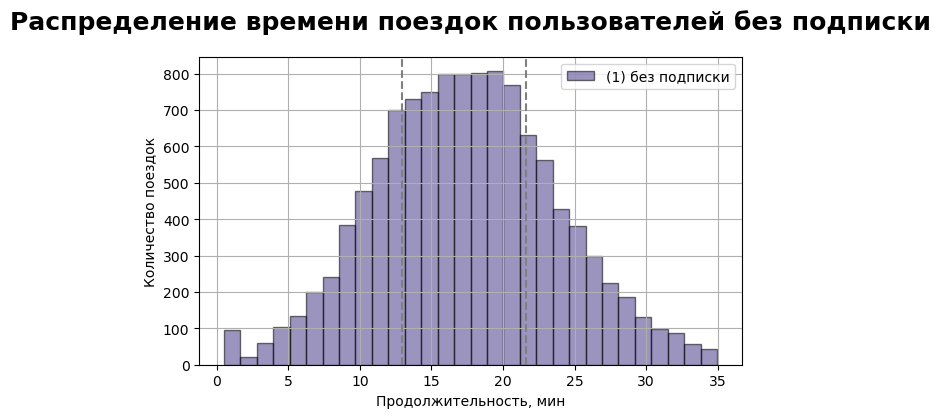

In [1884]:
merged_df_free['duration'].hist(figsize=(7, 4), 
                                bins=30, 
                                color='#483D8B',  
                                edgecolor='black', 
                                alpha=0.55) 
plt.title('Распределение времени поездок пользователей без подписки', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество поездок')
plt.legend(['(1) без подписки'])

# расчет квантилей
for q in [0.25, 0.75]:
    quantile = merged_df_free['duration'].quantile(q)
    plt.axvline(quantile, color='gray', linestyle='--')
    
plt.show()

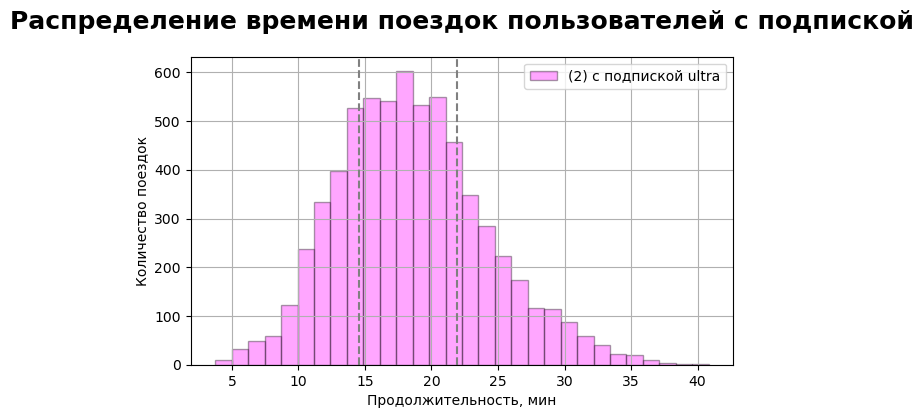

In [1885]:
merged_df_ultra['duration'].hist(figsize=(7, 4), 
                                 bins=30, 
                                 color='#FF00FF', 
                                 edgecolor='black',
                                 alpha=0.35) 
plt.title('Распределение времени поездок пользователей с подпиской', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Продолжительность, мин')
plt.ylabel('Количество поездок')
plt.legend(['(2) с подпиской ultra'])

# расчет квантилей
for q in [0.25, 0.75]:
    quantile = merged_df_ultra['duration'].quantile(q)
    plt.axvline(quantile, color='gray', linestyle='--')
    
plt.show()

**Вывод:**  гистораммы времени поездок c данными о пользователях без подписки (1) и с подпиской (2) показали, что:
* `без подписки` пользователи чаще ездят на самокатах 19 минут и 50% всех поездок лежит в диапазоне от 13 до 22 минут. Пользователи без подписки реже берут самокаты для поездок до 4 минут и более 30 минут. Наблюдается явный всплеск коротких поездок до 1-2 минут, возможно, из-за тестовых поездок, низкого заряда самоката или артефактов данных. 
* `с подпиской`пользователи чаще ездят на самокатах около 18 минут и 50% всех поездок лежит в диапазоне от 14 до 22 минут. Такие пользователи очень редко берут самокаты для поездок до 8 минут и более 33 минут.

Различия в поведении пользователей без подписки и с подпиской:
* пользователи с подпиской и без подписки имеют близкие по длительности моды - 18 и 19 минут соответственно,
* межквартильный размах пользователей с подпиской и без подписки имеют близкие значения: 14-22 минут и 13-22 минут соответственно,
* аномалия коротких поездок по времени есть только у пользователей без подписки,
* экстремально длинных продолжительностей поездки больше у пользователей с подпиской.

Пользователи с подпиской ultra имеют всплески аномально коротких поездок по дистанции, но всплеска аномально коротких поездок по времени у них нет. Можно предположить, что такие пользователи трятят больше времени на короткие по дистанции поездки из-за приложения: оно либо долго завершает аренду, либо некорректно считает время завершения аренды.  

**Вывод по этапу "Объединение данных"**

На этапе по объедению данных были:

1. объединены данные о пользователях, поездках и подписках в один датафрейм `merged_df` . Был использован метод merge() и параметр outer. 

2. созданы два новых датафрейма из датасета `merged_df`:

   * c данными о пользователях без подписки - `merged_df_free`(11568 записей)
   * с данными о пользователях с подпиской - `merged_df_ultra` (6500 записей).

3. построены гистораммы расстояний поездок и времени поездок c данными о пользователях без подписки и с подпиской, которые показали, что:
* чаще всего пользователи `без подписки` ездят на самокатах на 2500 метров. Также отмечен явный всплеск коротких поездок до 700 метров.
* чаще всего пользователи `с подпиской` ездят на самокатах на 3200 метров. Также отмечен явный всплеск коротких поездок до 1000 метров.
* `без подписки` пользователи чаще ездят на самокатах около 19 минут. Отмечен явный всплеск коротких поездок до 1-2 минут.
* `с подпиской` пользователи чаще ездят на самокатах около 18 минут. Всплеска коротких поездок не отмечено.

Вероятные причины коротких поездок по времени и дистанции (до 1000 метров/1-2 минут):
* недостоверность данных 
* неисправности самокатов на старте работы (например, низкий уровень заряда)
* тестовые поездки

Пользователи с подпиской ultra имеют всплески аномально коротких поездок по дистанции, но всплеска аномально коротких поездок по времени у них нет. Можно предположить, что такие пользователи тратят больше времени на короткие по дистанции поездки из-за приложения: оно либо долго завершает аренду, либо некорректно считает время завершения аренды.  Проверить данную гипотезу можно только при наличии дополнительных сведений о работе приложения и отчетов о вызываемых ошибках при его работе. 

##  Подсчёт выручки

### Расчет суммарного расстояния, количества поездок и суммарного времени пользователя за каждый месяц.

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными, где рассчитаем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц:

In [1886]:
pivot = merged_df.pivot_table(index=['user_id', 'month'], values = ['distance', 'duration', 'date'], aggfunc={
                                        'distance': 'sum',       # суммарная расстояние за месяц по пользователю
                                        'duration': 'sum',       # суммарная продолжительность за месяц по пользователю
                                        'date': 'count'}         # количество поездок за месяц по пользователю
                                            ).rename(columns={'distance': 'distance_per_month',
                                                              'duration': 'duration_per_month',
                                                              'date': 'rides_per_month'})
# cбрасываем индекс, чтобы month стал обычным столбцом
pivot = pivot.reset_index()
# создадим копию таблицы с кирилическими названиями для визуализации                                                     )
pivot_kirill_names = pivot.rename(columns={'distance_per_month': 'Сумма расстояний за месяц, м', 
                                           'duration_per_month': 'Продолжительность поездок за месяц, мин',
                                           'rides_per_month': 'Количество поездок за месяц'}
                                                   ).rename_axis(index={'user_id': 'ID пользователя', 
                                                                        'month': 'Месяц'})
# добавление градиентов и форматирование таблицы 
# выводим только 20 первых строк для визуализации, т.к. к styler нельзя применить метод head(), а только напрямую к датафрейму
styled_pivot_20 = pivot_kirill_names.head(20).style.background_gradient(cmap='Blues', subset=['Сумма расстояний за месяц, м', 
                                                                                              'Продолжительность поездок за месяц, мин', 
                                                                                              'Количество поездок за месяц']
                ).highlight_max(color='##D8BFD8', axis=1
                ).highlight_min(color='##D8BFD8', axis=1
                ).set_caption('Расчет суммарного расстояния, времени и количества поездок на пользователя по месяцам '
                ).set_table_styles([{'selector': 'caption', 'props': [('font-size', '16pt'), ('font-weight', 'bold')]}]
)

styled_pivot_20

,user_id,month,Количество поездок за месяц,"Сумма расстояний за месяц, м","Продолжительность поездок за месяц, мин"
0,1,1,2,7027.511294,41.416640
1,1,4,1,754.159807,6.232113
2,1,8,2,6723.470560,44.776802
3,1,10,2,5809.911100,31.578017
4,1,11,3,7003.499363,53.397424
5,1,12,2,6751.629942,27.203912
6,2,3,3,10187.723006,60.959959
7,2,4,2,6164.381824,39.048633
8,2,6,1,3255.338202,13.851127
9,2,7,2,6780.722964,46.170157


**Вывод:** был успешно создан новый  датафрейм `pivot` с агрегированными данными о поездках на основе датафрейма `merged_df` с объединёнными данными с колонками:
 * суммарное расстояние для каждого пользователя за каждый месяц,
 * суммарное время для каждого пользователя за каждый месяц,
 * количество поездок для каждого пользователя за каждый месяц.
   
А также добавлены индексы:
 * ID пользователя,
 * месяц  
Новый датафрейм `pivot` с агрегированными данными был визуализирован для первых 20 записей. 

### Расчет помесячной выручки по каждому пользователю

Для подсчёта стоимости поездок округлим до следующего целого числа продолжительность поездки. Проделаем это для каждой строки датафрейма `pivot` с помощью метода «потолок» библиотеки numpy — np.ceil():

In [1887]:
pivot['duration_per_month'] = np.ceil(pivot['duration_per_month']) 

 Для расчетов выручки обратимся к информации об условиях оплаты аренды самокатов: 

In [1888]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Добавим новый столбец с помесячной выручкой по каждому пользователю в сводную таблицу `pivot`.
Для этого выполним следующие шаги: 
* добавим `subscription_type` из `users` в `pivot`
* добавим информацию из `subscriptions` по `subscription_type` в `pivot`
* посчитаем выручку по условиям `subscriptions` в датафрейме `pivot`. 

In [1889]:
pivot = pivot.merge(users[['user_id', 'subscription_type']], on='user_id', how='left') #добавляем subscription_type из users в pivot 

pivot = pivot.merge(subscriptions, on='subscription_type', how='left') #добавляем информацию из subscriptions по subscription_type в pivot  

pivot['income_per_month'] = (pivot['duration_per_month'] * pivot['minute_price']    #считаем выручку для обеих подписок одинаково, т. к.   
                             + pivot['rides_per_month'] * pivot['start_ride_price'] #слагаемые при отсутсвии платы за старт/ подписку дадут 0
                             + pivot['subscription_fee']) 

Удаляем временные столбцы после расчета:

In [1890]:
pivot = pivot.drop(['minute_price', 'start_ride_price', 'subscription_fee'], axis=1) # subscription_type оставим для дальнейших расчетов
pivot.head() # проверим наличие столбцов датафрейме pivot

,user_id,month,rides_per_month,distance_per_month,duration_per_month,subscription_type,income_per_month
0,1,1,2,7027.511294,42.0,ultra,451.0
1,1,4,1,754.159807,7.0,ultra,241.0
2,1,8,2,6723.470560,45.0,ultra,469.0
3,1,10,2,5809.911100,32.0,ultra,391.0
4,1,11,3,7003.499363,54.0,ultra,523.0


**Вывод:** был успешно добавлен столбец `income_per_month` с помесячной выручкой по каждому пользователю в сводную таблицу `pivot`. Для этого были созданы и удалены временные столбцы, а также для подсчёта стоимости поездок округлили до следующего целого числа продолжительность поездки в `pivot`.

**Вывод по этапу "Подсчёт выручки":**

Для подсчета выручки по месяцам на каждого пользователя сервиса аренды самокатов GoFast:

* был успешно создан новый  датафрейм `pivot` с агрегированными данными о поездках на основе датафрейма `merged_df` с объединёнными данными. Новый датафрейм был визуализирован для первых 20 записей.
* был успешно добавлен столбец `income_per_month` с помесячной выручкой по каждому пользователю в сводную таблицу `pivot`.

## Проверка гипотез

На данном этапе
1) проверим следующие гипотезы:
* тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Исследуем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
* расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
* будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

2) определим тип теста для проверки гипотезы, где файл содержит данные о количестве обращений до обновления и после него.

### Гипотеза о том, что пользователями с подпиской тратят больше времени на поездки. 

Проверим гипотезу: тратят ли пользователи с подпиской больше времени на поездки? 

Если гипотеза окажется верной, то пользователи с подпиской могут быть «выгоднее» для компании. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Формулировка гипотезы:
* `Нулевая гипотеза (H0)`: пользователи с подпиской тратят столько же времени на поездки, чем пользователи без подписки.
* `Альтернативная гипотеза (H1)`: пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
* гипотезу проверим правосторонне - чтобы узнать, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: 

In [1891]:
# задаём уровень значимости
alpha = 0.05
# сохраним выборки Series продолжительностей поездок первой группы пользователей (с подпиской)
first_group_ultra = merged_df_ultra['duration']

# сохраним выборки Series продолжительностей поездок второй группы пользователей (без подписки)
second_group_free = merged_df_free['duration']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше» = 'greater'
results = st.ttest_ind(first_group_ultra, second_group_free, alternative='greater')

print(f'p-value: {results.pvalue}') # выведем значение p-value

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:** полученное значение p-value: 1.2804098316645618e-34  меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской «выгоднее» для компании с сервисом аренды самокатов GoFast из-за более длительных средних поездок, чем у пользователей без подписки.

### Гипотеза о том, что среднее расстояние поездки пользователей с подпиской не превышает 3130 метров. 

Проверим гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Так как расстояние одной поездки в 3130 метров — это оптимальное с точки зрения износа самоката. 

Формулировка гипотезы:
* `Нулевая гипотеза (H0)`: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку = 3130 метров (либо условие позволяет принимать значения и меньше 3130 метров, но на значения меньше 3130 метров отдельно  НЕ проверяем). 
* `Альтернативная гипотеза (H1)`: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров.
* гипотезу проверим правосторонне - чтобы узнать, если вдргуг среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров.

Используем метод для проверки гипотезы о равенстве среднего одной генеральной совокупности по выборкам и интересующей нас величины:

In [1892]:
distance_ultra = merged_df_ultra['distance'] # ср. расстояние, которое проезжают пользователи с подпиской за 1 поездку в метрах

interested_value = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(distance_ultra, 
                         interested_value, 
                         alternative='greater') # проверяем альтернатив.гипотезу на «больше» = 'greater'

print('p-значение:', results.pvalue) # выведем значение p-value

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')


p-значение: 0.9195368847849851
Не отвергаем нулевую гипотезу


**Вывод:** полученное значение p-value показывает, что вероятность случайно получить среднюю поездку не большую 3130 метров равна почти 92%, поэтому не отвергаем нулевую гипотезу. 
Значит, есть основания говорить, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

### Гипотеза о том, что выручка по месяцам от клиентов с подпиской выше, чем от клиентов без подписки.

Проверим гипотезу о том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Формулировка гипотезы:
* `Нулевая гипотеза (H0)`: среднее выручки по месяцам пользователей с подпиской равно среднему выручки по месяцам пользователям без подписки.
* `Альтернативная гипотеза (H1)`:среднее выручки по месяцам пользователей с подпиской больше среднего выручки по месяцам пользователей без подписки.
* гипотезу проверим правосторонне - чтобы узнать, что среднее выручки по месяцам пользователей с подпиской больше среднего выручки по месяцам пользователей без подписки.

Сгруппируем данные выручки по месяцам для обоих групп пользователей (с подпиской и без):

In [1893]:
income_per_month_ultra = pivot.query('subscription_type == "ultra"'
                                    ).pivot_table(index = 'month', values='income_per_month', aggfunc='sum'
                                                 ).reset_index()
print(income_per_month_ultra['income_per_month'].mean())
income_per_month_free = pivot.query('subscription_type == "free"'
                                   ).pivot_table(index = 'month', values='income_per_month', aggfunc='sum'
                                                ).reset_index()
income_per_month_free['income_per_month'].mean()

136549.75


184590.0

Используем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: 

In [1894]:
alpha = 0.05

# сохраним выборки Series продолжительностей поездок первой группы пользователей (с подпиской)
income_group_ultra = income_per_month_ultra['income_per_month']

# сохраним выборки Series продолжительностей поездок второй группы пользователей (без подписки)
income_group_free = income_per_month_free['income_per_month']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше» = 'greater'
results = st.ttest_ind(income_group_ultra, 
                       income_group_free, 
                       alternative='greater')

print(f'p-value: {results.pvalue}') # выведем значение p-value

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 0.9999999999996784
Не отвергаем нулевую гипотезу


**Вывод:** полученное значение `p-value` показывет вероятность получить данные в пользу Альтернативной гипотезы (H1) ("ultra > free") составляет примерно 99.99%. Поэтому не отвергаем нулевую гипотезу. То есть нет оснований полагать, что выручка от подписки "ultra" выше.

Проверим `новую гипотезу`: среднее выручки по месяцам пользователей без подписки больше среднего выручки по месяцам пользователей с подпиской. Данная гипотеза выдвинута на основе высокого значения p-value в предыдущем тесте, где предпологалось, что выручка от подписки "ultra" выше.

In [1895]:
alpha = 0.05

# сохраним выборки Series продолжительностей поездок первой группы пользователей (с подпиской)
income_group_ultra = income_per_month_ultra['income_per_month']

# сохраним выборки Series продолжительностей поездок второй группы пользователей (без подписки)
income_group_free = income_per_month_free['income_per_month']

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше» = 'greater'
results = st.ttest_ind(income_group_free, 
                       income_group_ultra, 
                       alternative='greater')

print(f'p-value: {results.pvalue}') # выведем значение p-value

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-value: 3.216726513296846e-13
Отвергаем нулевую гипотезу


**Вывод:** полученное значение p-value: 3.216726513296846e-13  меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу о равенстве среднего выручки пользователей с подпиской и без в пользу альтернативной. 
Есть основания говорить, что среднее выручки по месяцам пользователей без подписки больше среднего выручки по месяцам пользователей с подпиской.

### Определение типа теста для проверки гипотезы об уменьшении обращений после обновления сервера.

В ситуации, где техническая команда сервиса обновила сервера, из-за чего количество обращений в техподдержку значимо снизилось (есть файл с количеством обращений пользователей до обновления и после), используем `тест зависимых (парных) выборок` для анализа одной генеральной совокупности, с которой произошли некоторые изменения, чтобы проверить данную гипотезу.  
В этом случае необходимо  проверять, равны ли средние количества обращений пользователей до и после обновления сервера.   

Гипотезы в этом случае будут сформулированы так:
* `Нулевая гипотеза (H0)`: средние значения количества обращений до и после обновления сервера равны,
* `Альтернативная гипотеза (H1)`: среднее значения количества обращений до обновления больше среднего значения после обновления сервера.

Чтобы проверить гипотезу о равенстве средних значений до и после обновления сервера в Python, нужно применить метод scipy.stats.ttest_rel(), которому достаточно передать всего два параметра: наборы данных до обновления сервера и после. Подразумевается, что оба набора должны быть одинаковыми по размеру.

**Вывод по этапу "Проверка гипотез":**

На данном этапе проверили следующие гипотезы с помощью тестирования:
1)  `Гипотеза о том, что пользователями с подпиской тратят больше времени на поездки.`
    Нулевая гипотеза о равенстве трат времени на поездки для пользователей с подпиской и без нее была отвергнута в пользу альтернативной. Есть основания говорить, что пользователи с подпиской тратят больше времени на поездки на самокатах, чем пользователи без подписки.
3) `Гипотеза о том, что среднее расстояние поездки пользователей с подпиской не превышает 3130 метров.`
    Нулевая гипотеза не опроверглась. Значит, есть основания говорить, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
5) `Гипотеза о том, что выручка по месяцам от клиентов с подпиской выше, чем от клиентов без подписки.`
   Нулевая гипотеза о равенстве выручки по месяцам от клиентов с подпиской и без подписки не была отвергнута. То есть нет оснований полагать, что выручка от подписки "ultra" выше.  
   Сформулировали новую гипотезу: `среднее выручки по месяцам пользователей без подписки больше среднего выручки по месяцам пользователей с подпиской.` Отвергнули нулевую гипотезу о равенстве среднего выручки пользователей с подпиской и без в пользу альтернативной. Есть основания говорить, что среднее выручки по месяцам пользователей без подписки больше среднего выручки по месяцам пользователей с подпиской.

На этапе определения типа теста для проверки гипотезы, был сделан вывод, что в ситуации, где техническая команда сервиса обновила сервера, из-за чего количество обращений в техподдержку значимо снизилось (есть файл с количеством обращений пользователей до обновления и после), необходимо использовать `тест зависимых (парных) выборок для анализа одной генеральной совокупности`, с которой произошли некоторые изменения.

Исходя из полученных данных при проверке гипотез, можно сделать вывод, что Ultra пользователи платят абонентскую плату, но меньше тратят на поездки. При этом они тратят больше времени на поездки на самокатах, чем пользователи без подписки. А пользователи без подписки активно платят за старт поездки (50₽) и минуты (8₽). Выходит, что пользователи без подписки выгоднее для компании, а модель подписки ultra менее рентабельна. 

## Распределения

### Акция с раздачей промокодов.

`Задача:` нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки сервиса самокатов Gofast , в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

`Дано:`  
* Количество исходов - 2 (пользователь может либо отказаться от подписки, либо продлить)
* Вероятность успеха каждого исхода (p) = 10% (подписку продлевают 10 % пользователей)
* Количество успехов = 100 (продленных подписок)
* Вероятность не выполнить план = 5%. Вероятность P(X < 100) ≤ 0.05 (то, что должно остаться слева до значения 100 на графике)

`Найти:`
* Минимальное количество промокодов для рассылки (n)

`Решение:`  
При известных данных используем формулу биномиально распределения, чтобы найти минимальное количество промокодов для рассылки. cdf() функция распределения: binom.cdf(k, n, p) ≤ вероятности 0.05    
Где:
* k — число успехов (продлений)
* n — число испытаний (рассылаемых промокодов)
* p — вероятность успеха (0.1)

10% пользователей соглашается продлить подписку, поэтому предлагается проверить распределение начиная с `n` = 100 * 10 = 1000:

In [1896]:
p = 0.1          # вероятность успеха
k_target = 100   # количество успехов
alpha = 0.05     # порог - вероятность не выполнить план 

# находим минимальное n церез цикл пока не достигнем предела вероятности в 0.05
n = 1000  # начинаем с оценки 1000 
while binom.cdf(k_target, n, p) >= alpha: # сравнение не строгое из-за условия Р не выполнить план = 5%. Вероятность P(X < 100) ≤ 0.05
    n += 1                                # т е (менее 100) может быть равно 0.05 и меньше 0.05

print(f"Минимальное количество промокодов: {n}")

Минимальное количество промокодов: 1172


Построим график с минимальным количестом промокодов. Для построения графика распределения используем метод pmf().
На графике мы отображаем вероятности для каждого возможного числа продлений (от `k_min` до `k_max`).

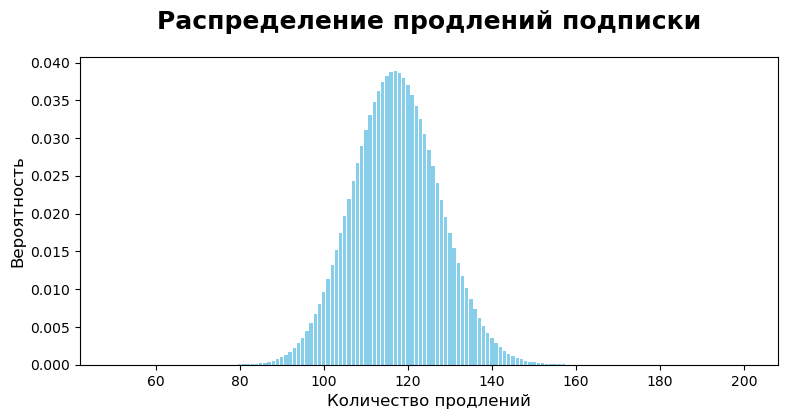

In [1897]:
p = 0.1      # вероятность успеха
n = 1172     # минимальное количество акций для подписки

# создаем массив k от 0 до n, но для графика возьмем только часть с 50 до 200
k_min = 50   # минимальное k для отображения
k_max = 200  # максимальное k для отображения
    
# создаем массив k в диапазоне [k_min, k_max]
k_values = np.array(range(k_min, k_max + 1)) 
current_values = binom.pmf(k_values, n, p)

plt.figure(figsize=(9, 4)) 
plt.bar(k_values, current_values, color='skyblue') # передаем графику диапозон k-значений для OX, 
    
plt.title(f'Распределение продлений подписки', fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Количество продлений', fontsize=12)
plt.ylabel('Вероятность', fontsize=12)
plt.show()

График не скошен, график расположился симметрично, так как: 
1) были установлены края промежутка от 50 до 200, в котором лежит большинство вероятностей биномиального распределения 
2) хоть вероятность успеха не велика - всего 0.1, но количество экспериментов очень большое - более тысячи.
   
На гистограмме видно, что при рассылке 1172 акций число продлений 100 - очень вероятный результат, и в диапазоне от 80 до 99 (до 100) примерно до 5% всего распределения. Но оценка по графику довольно приблизительна. Проверим n=1172 формулой `binom.cdf(k, n, p)`, где подставим имеющиеся данные для нахождения вероятности, и если вероятность окажется > 0.05, то изменим значение n:

In [1898]:
binom.cdf(100, 1172, 0.1)

0.04954795210203065

**Вывод:** были установлены условия проведения акции с раздачей промокодов на один бесплатный месяц подписки сервиса самокатов Gofast:

* минимальное количество промокодов, которых необходимо разослать - 1172 шт. при условии, что как минимум 100 существующих клиентов должны продлить эту подписку и при этом вероятность не выполнить план примерно 5 %.
  
Был использован биномиальный метод распределения и параметры распределения, а также был построен график распределения и проверка минимального количество промокодов, необходимых для рассылки с последующим продлением не менее 100 пользователями. 

### Рассылка push-уведомлений в мобильном приложении.

`Задача:` отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

`Дано:`
* Количество исходов - 2 (клиенты могут открыть его или не открывать)
* Вероятность успеха каждого исхода = 40% (уведомления открывают около 40 % получивших клиентов)
* Количество экспериментов = 1 000 000 (планируется разослать 1 млн уведомлений)
* Количество успехов <= 399 500 (не более 399,5 тыс. пользователей)

`Найти:`
* Вероятность, при которой уведомление откроют не более 399,5 тыс. пользователей. P(k <= 399 500) 

`Решение:` 
Воспользуемся аппроксимацией биномиального распределения нормальным и cdf() для быстрой оценки.
Где:
* k — число успехов (открытие push-уведомления) = 399 500
* n — число испытаний (рассылаемых push-уведомления) = 1 000 000
* p — вероятность успеха  = 0.4
* мат.ожидание  = n * p 
* ст.отклонение = n * p * (1-p) 

In [1899]:
# задаем параметры биномиального распределения - число рассылок и вероятность открытия уведомления 
n = 1000000
p = 0.4

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = ((n * p * (1 - p)))**0.5

#з адаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399 500
result = distr.cdf(399500)
print(result)

0.15371708296369768


Больше 15% - вероятность того, что уведомление откроют не более 399,5 тыс пользователей. Достаточно большой процент того, что уведомления прочнут менее целевого количества пользователей. Возможно, стоит увеличить количество рассылок push-уведомлений. 

С помощью аппроксимации построим примерный график распределения по этим данным:

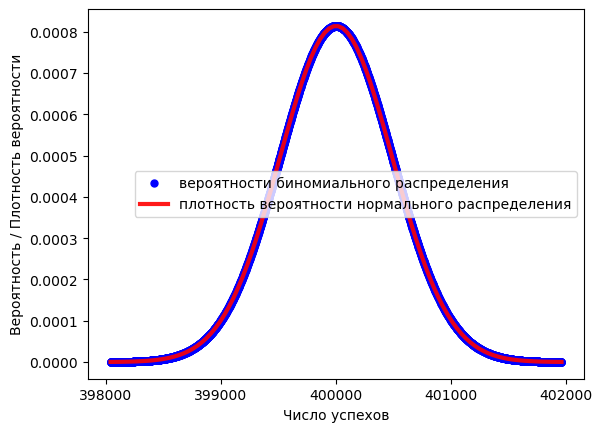

Условие выполняется


In [1900]:
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * (n * p * (1 - p))**0.5)
right = int(n * p + 4 * (n * p * (1 - p))**0.5)
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
	      label='вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = (n * p * (1 - p))**0.5
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.9, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

# зададим автоматические метки оси X (макс. 5 меток) чтобы метки не сливались на оси X 
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))

# подпишем оси графика для обоих распеределений 
ax.set_xlabel('Число успехов') 
ax.set_ylabel('Вероятность / Плотность вероятности')

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

На графике точки с вероятностями биноминального распределения слились в линию из-за высокого n — числа испытаний (рассылаемых push-уведомления) = 1 000 000.    
Математическое ожидание ± три стандартных отклонения лежат в пределах от[ 0,  n] а значит, аппроксимация работает. Это видно и на графике, что линии плотности вероятности нормального распределения и вероятности биномиального распределения находятся максимально близко к друг другу в каждой точке вероятности биномиального распределения.  

**Вовод:** была рассчитана вероятность того, что уведомление откроет меньше целевого числа клиентов при заданных условиях рассылки:

* Больше 15% - вероятность того, что уведомление откроют не более 399,5 тыс пользователей при рассылке 1 млн. push-уведомлений в мобильном приложении и октытии клиентами 40% уведомлений.
Это достаточно большой процент того, что уведомления прочнут менее целевого количества пользователей. Возможно, чтобы точно достичь данную целевую аудиторию, стоит увеличить количество рассылок push-уведомлений. 
  
Расчет был произведен аппроксимацией биномиального распределения нормальным и cdf() для быстрой оценки вероятности, а также был построен график плотности вероятности нормального распределения и вероятности биномиального распределения, чтобы увидеть, что выполняется условие аппроксимации и то, что найденная вероятность, рассчитанная с помощью нормальной аппроксимации, близка к истинному значению. 


**Вывод по этапу "Распределения":**

Было решено 2 ситуационных задачи, в которых были применены следующие распределения:

*  биномиальный метод распределения и cdf() для нахождения количества испытаний, а также был построен график распределения. 
*  аппроксимациия биномиального распределения нормальным и cdf() для быстрой оценки вероятности, а также был построен график плотности вероятности нормального распределения и вероятности биномиального распределения, чтобы увидеть, что выполняется условие аппроксимации и то, что найденная вероятность, рассчитанная с помощью нормальной аппроксимации, близка к истинному значению.


## Общий вывод по исследованию данных сервиса аренды самокатов GoFast

В ходе исследований данных сервиса аренды самокатов GoFast были записаны данные из файлов в 3 разных датафрейма `users`, `rides`, `subscriptions` и узучены путем построения графиков для количественных параметров и знакомства с общей информации в них.      
Рассмотрев датафрейм `subscriptions`, был сделан вывод, что он содержит исключительно техническую корректную информацию без пропусков валидного типа данных о 2 вариантах оплаты за услуги сервиса, поэтому дальнейшая предобработка данного датафрейма не требуется. 

На этапе предобработки данных был преобразован тип столбца `date`, был добавлен новый столбец `month`, была проведена проверка на пропуски данных, были устранены дубликаты в датафрейме `users`.  

На этапе исследовательского анализа данных выяснили, что:
* чаще самокатами GoFast пользуются в Пятигорске, реже в Москве.
* пользователей без подписки больше в среднем на 9%, чем пользователей с подпиской в сервисе GoFast.
* больше всего сервисом GoFast пользуются пользователи около 25 лет. Ядро целевой аудитории пользователи 22-28 лет.
* 3400 метров - самая частая дистанция для поездок на самокатах у пользователей. Половина длин поездок лежит от 2500 метров до 3700 метров.
* 18 минут - самая частая продолжительность поездок на самокатах в сети GoFast. 50% поездок лежит в интервале от 13 до 22 минут.

На этапе по объедению данных:
* были объединены данные о пользователях, поездках и подписках в один датафрейм `merged_df`.
* были созданы два датафрейма из `merged_df`: c данными о пользователях без подписки - `merged_df_free`и с подпиской - `merged_df_ultra`.
* были построены гистораммы расстояний поездок и времени поездок c данными о пользователях без подписки и с подпиской, которые показали, что чаще всего ultra-пользователи ездят на самокатах на 2500 метров и 19 иминут, free-пользователи - на 3200 метров и 18 минут. Отмечен явный всплеск коротких длин поездок до 700 метров у ultra-пользователей, и до 1000 метров и free-пользователей. И выявлен всплекс по времени поездок до 1-2 минут только у пользователей без подписки, у ultra-пользователей всплеска коротких поездок не отмечено.   
Вероятные причины (всплесков) коротких поездок по времени и дистанции (до 1000 метров и 1-2 минут): недостоверность данных, неисправности самокатов на старте работы (например, низкий уровень заряда), тестовые поездки.

В ходе этапа подсчёта выручки по месяцам на каждого пользователя сервиса аренды самокатов GoFast:
* был создан новый  датафрейм `pivot` с агрегированными данными о поездках на основе датафрейма `merged_df`. Данные были визуализированы.
* был добавлен столбец `income_per_month` с помесячной выручкой по каждому пользователю в сводную таблицу `pivot`.

На этапе проверки гипотез с помощью тестирования было установлено, что:
* есть основания говорить, что пользователи с подпиской тратят больше времени на поездки на самокатах, чем пользователи без подписки.
* есть основания утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
* есть основания говорить, что среднее выручки по месяцам пользователей без подписки больше среднего выручки по месяцам пользователей с подпиской.
* в ситуации, где техническая команда сервиса обновила сервера, из-за чего количество обращений в техподдержку значимо снизилось (есть файл с количеством обращений пользователей до обновления и после), необходимо использовать `тест зависимых (парных) выборок для анализа одной генеральной совокупности`, с которой произошли некоторые изменения.

На этапе "Распределения" было решено 2 ситуационных задачи, в которых были применены следующие распределения:
*  биномиальный метод распределения и cdf() для нахождения количества испытаний, а также был построен график распределения. 
*  аппроксимациия биномиального распределения нормальным и cdf() для быстрой оценки вероятности, а также был построен график плотности вероятности нормального распределения и вероятности биномиального распределения, чтобы увидеть, что выполняется условие аппроксимации и то, что найденная вероятность, рассчитанная с помощью нормальной аппроксимации, близка к истинному значению.

Резюмируя все полученные данные при проверке гипотез и исследовательском анализе, можно сделать вывод, что ultra-пользователи приносят компании меньше выручки в сравнении с free-пользователями, при том, что первые тратят больше времени на поездки на самокатах, чем пользователи без подписки. Так происходит, потому что пользователи с подпиской платят абонентскую плату (199 руб.), но меньше денег тратят на поездки в целом. А пользователи без подписки активно платят за старт поездки (50 руб.) и минуты (8 руб.). Выходит, что пользователи без подписки выгоднее для компании, чем пользователи с подпиской, а бизнес-модель подписки ultra менее рентабельна, чем бизнес-модель подписки free. Рекомендуется изменить условия оплаты тарифного плана ultra. 